In [214]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

Introduction

In the rapidly evolving field of financial services, predictive analytics has become a cornerstone
for decision-making and strategic planning. Financial institutions increasingly rely on data-driven
insights to optimize their services and manage risks effectively. One critical area of interest is the
ability to predict the likelihood of financial arrangements being terminated prematurely. Such
predictions can help institutions better understand client behaviours, manage financial risks,
and tailor services to client needs.

This use case focuses on building a predictive model using an anonymized dataset containing
detailed records of financial arrangements. The goal is to develop a model that can accurately
predict whether a financial arrangement will be terminated, based on various attributes such as
demographic data, financial details, and arrangement specifics. These predictions will aid in
proactive decision-making, allowing financial advisors to intervene or adjust terms to prevent
potential defaults and improve client retention.

Use Case Overview

Develop a predictive model using an attached dataset to assess the likelihood of a financial
arrangement being terminated. This process includes data pre-processing, feature selection,
building and tuning a classification model, evaluating its performance, and interpreting the
results. The goal is to provide actionable insights that could influence decision-making regarding
these financial arrangements.

Model Building

Utilize machine learning algorithms to predict the "Terminated" status, a binary variable
indicating whether an arrangement was discontinued. Suitable models could include Logistic
Regression, Decision Trees, or Ensemble Methods like Random Forests and Gradient Boosting
Machines. Model selection will depend on the accuracy, interpretability, and computational
e>iciency required by the stakeholders.

Parameters
- clientid
- Lower_Super_Output_Area_Code - Generic area code, used if the postcode is standard.
- Output_Area_Classification_Code - Represents high-level social grades.
- AB - Percentage of individuals in the highest social grade (AB).
- C1 - Percentage of individuals in the lower middle social grade (C1).
- C2 - Percentage of individuals in the skilled working social grade (C2).
- DE - Percentage of individuals in the semi-skilled and unskilled social grade (DE).
- DOB_Year
- DOB_Month
- Gender - Gender of the client, encoded as an integer.
- Marital_Status - Marital status of the client, encoded as an integer.
- Employment_Status
- iva_joint
- Partner_DOB_Year
- Partner_DOB_Month
- Partner_Gender
- Partner_Employment_Status
- household_income
- household_expenses
- household_DI - Disposable income of the household.
- Household_Total_Debt
- no_adults
- under_16
- under_18 - Number of children aged 16 to 18 in the household.
- arrangement_status - Status of the financial arrangement, encoded as an integer.
- Arrangement_startdate_year - Start year of the financial arrangement.
- Arrangement_Startdate_month - Start month of the financial arrangement.
- duration_Arrangement_to_Date - Duration of the arrangement in months.
- Total_Expected_Duration - Expected total duration of the arrangement in months.
- home_owner_flag - Indicates whether the client owns a home (boolean).
- owned_property_count - Number of properties owned.
- vehicle_count - Number of vehicles owned.
- Closure_Status - Status of the arrangement closure, encoded as an integer.
- Terminated - Indicates whether the arrangement was terminated(boolean).
- Terminated_Year - Year the arrangement was terminated (if applicable).
- Terminated_Month - Month the arrangement was terminated (if applicable).
- Completed - Indicates whether the arrangement was completed (boolean).
- dividend_approved - Dividend approved, represented in pence per pound.
- payment_frequency - Frequency of payments, encoded as an integer.
- contributions_expected_to_date - Contributions expected up to the current date.
- contributions_received_to_date - Contributions received up to the current date.
- TotalPaymentsDue - Total payments due under the arrangement.
- Arrears_Amount - Amount of arrears under the arrangement.
- arrears_months - Number of months the arrangement has been in arrears.
- Arrears_Category - Category of arrears, encoded as an integer.
- NoMonths_FirstPayment - Number of months until the first payment was made.
- agreed_missed_flag - Indicates whether there was an agreed missed payment (boolean).
- NoMonth_FirstMissedPayment - Number of months until the first payment was missed.
- Physical_Disability_Vulnerability - Indicates physical disability (boolean).
- Illness_Vulnerability - Indicates illness vulnerability (boolean).
- Addiction_Vulnerability - Indicates addiction vulnerability (boolean).
- Mental_Health_Vulnerability - Indicates mental health vulnerability (boolean).

# EDA

In [152]:
data = pd.read_csv("dataset_v2.csv")
pd.set_option('display.max_columns', None)
data

## 117 clients (rows) with 44 features (columns)

,Lower_Super_Output_Area_Code,Output_Area_Classification_Code,AB,C1,C2,DE,Gender,Marital_Status,Employment_Status,iva_joint,Partner_Gender,Partner_Employment_Status,household_income,household_expenses,household_DI,Household_Total_Debt,no_adults,under_16,under_18,duration_Arrangement_to_Date,Total_Expected_Duration,home_owner_flag,owned_property_count,vehicle_count,Terminated,dividend_approved,payment_frequency,contributions_expected_to_date,contributions_received_to_date,TotalPaymentsDue,Arrears_Amount,arrears_months,Arrears_Category,NoMonths_FirstPayment,agreed_missed_flag,NoMonth_FirstMissedPayment,Physical_Disability_Vulnerability,Illness_Vulnerability,Addiction_Vulnerability,Mental_Health_Vulnerability,age,age_partner,DOB_Year,DOB_Month
0,4174,79,0.137144,0.350114,0.172340,0.422491,2,1,11,1,NaN,NaN,77218,88410,58132,8906,1,0,0,11,76,1,0,0,0,21.29,1,1093.79,1198.79,73595,-105.00,NaN,1.0,1.0,1,NaN,1,1,1,1,42,NaN,1998,6
1,4507,124,0.160399,0.277084,0.228879,0.272480,1,1,8,1,NaN,NaN,64230,79617,79945,62413,1,0,0,10,71,1,0,0,1,22.14,1,704.30,354.30,84807,350.00,3.0,1.0,2.0,1,7.0,1,1,1,1,53,NaN,1932,11
2,1860,119,0.109031,0.246483,0.279942,0.326296,2,1,6,1,NaN,NaN,75055,54276,83050,55028,1,0,0,13,60,1,0,1,1,15.11,1,830.00,30.00,46539,800.00,12.0,2.0,0.0,0,1.0,1,1,1,1,27,NaN,1957,7
3,2294,148,0.381030,0.316609,0.233351,0.418756,2,1,11,1,NaN,NaN,57373,58492,96402,8287,1,0,0,12,61,1,0,0,1,29.24,1,1000.00,300.00,8491,700.00,8.0,NaN,1.0,1,4.0,1,1,1,1,24,NaN,1999,1
4,2130,121,0.122695,0.254124,0.222952,0.305580,2,5,6,1,NaN,NaN,32480,54002,3983,34660,2,4,0,7,61,1,0,0,1,31.67,1,700.00,200.00,51192,500.00,3.0,NaN,1.0,1,3.0,1,1,1,1,31,NaN,1958,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,4533,40,0.109303,0.357453,0.247198,0.300990,2,5,11,1,1.0,8.0,39709,90613,85386,92357,1,0,0,10,67,1,0,2,1,23.40,1,1271.45,579.17,83503,692.28,5.0,NaN,1.0,1,5.0,1,1,1,1,32,52.0,1974,9
113,4798,66,0.144789,0.271521,0.287837,0.320679,2,1,11,1,NaN,NaN,62120,75910,26425,27660,1,0,0,12,60,1,0,0,1,38.70,1,570.00,228.00,30759,342.00,7.0,2.0,1.0,1,5.0,1,1,1,1,24,NaN,1952,7
114,2275,101,0.127220,0.296572,0.228280,0.333646,2,1,11,1,NaN,NaN,20250,53375,27685,6084,1,0,0,12,62,1,0,0,1,20.64,1,1152.01,402.01,86708,750.00,7.0,NaN,1.0,1,4.0,1,1,1,1,33,NaN,2001,3
115,2016,116,0.117146,0.303027,0.204970,0.336354,2,6,7,1,NaN,NaN,22172,36435,25578,83197,1,2,0,13,61,1,0,1,0,32.58,1,1374.00,1487.00,61112,-113.00,NaN,NaN,1.0,1,NaN,1,1,1,1,45,NaN,1963,8


In [208]:
relevant_features = []
relevant_features = pd.DataFrame(relevant_features)

In [153]:
data.info()

## we have float and int type data
## notice there is also no clientid column - this is not particularly relevant to us since we are working with anonymised data
## we can see some of the paramets have no null features (117 non-null), whereas others have mostly missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lower_Super_Output_Area_Code       117 non-null    int64  
 1   Output_Area_Classification_Code    117 non-null    int64  
 2   AB                                 117 non-null    float64
 3   C1                                 117 non-null    float64
 4   C2                                 117 non-null    float64
 5   DE                                 117 non-null    float64
 6   Gender                             117 non-null    int64  
 7   Marital_Status                     117 non-null    int64  
 8   Employment_Status                  117 non-null    int64  
 9   iva_joint                          117 non-null    int64  
 10  Partner_Gender                     10 non-null     float64
 11  Partner_Employment_Status          3 non-null      float64

In [154]:
data.describe()

,Lower_Super_Output_Area_Code,Output_Area_Classification_Code,AB,C1,C2,DE,Gender,Marital_Status,Employment_Status,iva_joint,Partner_Gender,Partner_Employment_Status,household_income,household_expenses,household_DI,Household_Total_Debt,no_adults,under_16,under_18,duration_Arrangement_to_Date,Total_Expected_Duration,home_owner_flag,owned_property_count,vehicle_count,Terminated,dividend_approved,payment_frequency,contributions_expected_to_date,contributions_received_to_date,TotalPaymentsDue,Arrears_Amount,arrears_months,Arrears_Category,NoMonths_FirstPayment,agreed_missed_flag,NoMonth_FirstMissedPayment,Physical_Disability_Vulnerability,Illness_Vulnerability,Addiction_Vulnerability,Mental_Health_Vulnerability,age,age_partner,DOB_Year,DOB_Month
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,10.000000,3.0,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,63.000000,31.000000,96.000000,117.000000,63.000000,117.0,117.000000,117.000000,117.0,117.000000,10.000000,117.000000,117.000000
mean,3116.521368,95.538462,0.192206,0.298449,0.217884,0.300638,1.581197,2.726496,9.085470,0.897436,1.300000,8.0,50254.658120,50101.435897,51512.196581,51963.376068,1.034188,0.692308,0.0,8.760684,62.051282,0.965812,0.034188,0.444444,0.504274,25.161368,1.111111,852.829487,591.343419,47925.735043,261.486068,5.063492,1.645161,0.937500,0.846154,3.730159,1.0,0.888889,0.982906,1.0,39.837607,48.600000,1963.111111,5.957265
std,1145.813132,33.476327,0.066194,0.029787,0.034326,0.076021,0.512588,2.336457,2.336268,0.304694,0.483046,0.0,27411.701048,28524.797350,27257.065385,29340.282286,0.472185,1.367489,0.0,3.483086,3.975889,0.182493,0.182493,0.548422,0.502132,11.448134,0.487389,568.312479,598.009264,28121.036995,308.383557,3.364296,0.486373,0.843707,0.362353,3.593032,0.0,0.315621,0.130179,0.0,11.401722,6.736303,22.653225,3.447621
min,1021.000000,40.000000,0.044566,0.234480,0.104970,0.136618,1.000000,1.000000,2.000000,0.000000,1.000000,8.0,2279.000000,1060.000000,1806.000000,2007.000000,0.000000,0.000000,0.0,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,7.890000,1.000000,0.000000,0.000000,1526.000000,-113.000000,0.000000,1.000000,0.000000,0.000000,-11.000000,1.0,0.000000,0.000000,1.0,22.000000,34.000000,1924.000000,1.000000
25%,2130.000000,67.000000,0.144789,0.278281,0.197023,0.249473,1.000000,1.000000,7.000000,1.000000,1.000000,8.0,28856.000000,25070.000000,29831.000000,27292.000000,1.000000,0.000000,0.0,6.000000,60.000000,1.000000,0.000000,0.000000,0.000000,17.330000,1.000000,500.000000,125.000000,24411.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,31.000000,50.500000,1946.000000,3.000000
50%,3169.000000,98.000000,0.191179,0.294308,0.219519,0.302243,2.000000,1.000000,11.000000,1.000000,1.000000,8.0,49756.000000,52474.000000,51072.000000,51106.000000,1.000000,0.000000,0.0,9.000000,60.000000,1.000000,0.000000,0.000000,1.000000,24.080000,1.000000,720.000000,402.010000,45859.000000,200.000000,5.000000,2.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.000000,1.0,39.000000,52.000000,1961.000000,6.000000
75%,4092.000000,127.000000,0.233353,0.313951,0.239848,0.342070,2.000000,5.000000,11.000000,1.000000,1.750000,8.0,75182.000000,74543.000000,75859.000000,76758.000000,1.000000,1.000000,0.0,12.000000,62.000000,1.000000,0.000000,1.000000,1.000000,31.760000,1.000000,1100.000000,900.000000,75318.000000,530.000000,7.000000,2.000000,1.000000,1.000000,5.500000,1.0,1.000000,1.000000,1.0,47.000000,52.000000,1983.000000,9.000000
max,4943.000000,148.000000,0.388540,0.394157,0.303933,0.466688,3.000000,7.000000,11.000000,1.000000,2.000000,8.0,98432.000000,97999.000000,98659.000000,99875.000000,2.000000,7.000000,0.0,14.000000,85.000000,1.000000,1.000000,2.000000,1.000000,68.060000,4.000000,2717.000000,2490.970000,98883.

In [186]:
## check for missing values 
data.isnull().sum()

Lower_Super_Output_Area_Code       0
Output_Area_Classification_Code    0
AB                                 0
C1                                 0
C2                                 0
DE                                 0
Gender                             0
Marital_Status                     0
Employment_Status                  0
iva_joint                          0
household_income                   0
household_expenses                 0
household_DI                       0
Household_Total_Debt               0
no_adults                          0
under_16                           0
duration_Arrangement_to_Date       0
Total_Expected_Duration            0
home_owner_flag                    0
owned_property_count               0
vehicle_count                      0
Terminated                         0
dividend_approved                  0
payment_frequency                  0
contributions_expected_to_date     0
contributions_received_to_date     0
TotalPaymentsDue                   0
A

In [156]:
## check for unique values for each features 
for feature in data.columns:
    uniq = np.unique(data[feature])
    print('{}: {} distinct values -  {}'.format(feature,len(uniq),uniq))

Lower_Super_Output_Area_Code: 116 distinct values -  [1021 1034 1130 1161 1189 1201 1241 1330 1455 1459 1466 1474 1562 1600
 1646 1702 1747 1769 1775 1815 1860 1955 1975 1995 2016 2021 2082 2095
 2129 2130 2184 2215 2238 2267 2275 2294 2297 2363 2390 2478 2482 2500
 2515 2528 2579 2585 2638 2685 2806 2899 2955 2981 3041 3047 3061 3068
 3135 3139 3169 3214 3253 3300 3317 3324 3363 3391 3433 3435 3449 3556
 3558 3612 3613 3734 3747 3777 3824 3853 3879 3888 3904 3919 3945 4003
 4005 4073 4092 4152 4171 4174 4202 4342 4380 4385 4417 4444 4459 4461
 4485 4499 4507 4533 4547 4556 4632 4638 4735 4753 4772 4773 4798 4843
 4890 4893 4934 4943]
Output_Area_Classification_Code: 73 distinct values -  [ 40  42  43  44  45  46  47  48  50  51  52  53  54  62  63  65  66  67
  68  69  71  72  73  74  75  76  79  80  81  82  83  84  86  87  90  91
  92  96  98  99 101 102 104 105 110 111 112 114 116 117 118 119 120 121
 123 124 125 127 128 129 130 131 133 135 136 138 140 142 143 144 145 147
 148]
AB: 

In [157]:
# columns 0-5 (up to DE) - related to demographic information

# column 6 - gender - has 3 values; row 22 has gender '3' - typo? is 1 male and 2 female? would want more info from firm

# column 7 - marital status - has 6 values 1, 2, 3, 5, 6, 7 - does this mean what marriage they're on? are we assuming everyone is thus married? if so, why isn't there more information on partners? (gender/employment/etc)

# column 8 - employment status - 8 distinct values -  [ 2  4  5  6  7  8  9 11] - ????? unclear what the values mean

# column 9 - iva_joint - yes or no

# columns 10-11 - related to partner - 107 missing values for gender, 114 for employment status - does this mean clients in this cohort generally do not have a partner? how does that pair with the marital status never being zero? do we just not have the information on the client's partner? either way, given the significant number of missing values, 107 and 114 out of 117, we cannot use this to make any meaningful predictions and so should be dropped
# column 41 - age of partner

# columns 12-15 related to money in and out of household

# column 16 - no of adults

# column 17 - no of children under 16 in the household - dependents 

# column 18 - no of children 16-18 - this is zero for all our clients so we can drop this too

# columns 19-20 related to arrangement duration

# column 21,22,23 - home owner, property count, vehicle count

# column 24 - terminated - this is our y values - we should isolate this 

# column 25 - dividend

# column 26 - payment freq

# columns 27, 28, 29 - payments

# columns 30, 31, 32 - arrears 

# columns 33,34,35 - first payment related

# columns 36, 39 - physical disability and MH vulnerability - 1 for everyone, can be dropped 

# columns 37, 38 - illness and addiction

# column 40 - age

# columns 42,43 - year and month DOB of client 

In [158]:
# note also many missing values in arrears_months, Arrears_Category, NoMonths_FirstPayment, NoMonth_FirstMissedPayment - let's drop these too
# columns 31, 32, 33, 35

In [159]:
# drop as per above - columns 10, 11, 18, 36, 39, 41

columns_to_drop = [10, 11, 18, 31, 32, 33, 35, 36, 39, 41]

data.drop(data.columns[columns_to_drop], axis=1, inplace=True)

In [160]:
# the random 3 is throwing off the gender exploration - let's drop that row

data = data[data["Gender"] != 3]

data

,Lower_Super_Output_Area_Code,Output_Area_Classification_Code,AB,C1,C2,DE,Gender,Marital_Status,Employment_Status,iva_joint,household_income,household_expenses,household_DI,Household_Total_Debt,no_adults,under_16,duration_Arrangement_to_Date,Total_Expected_Duration,home_owner_flag,owned_property_count,vehicle_count,Terminated,dividend_approved,payment_frequency,contributions_expected_to_date,contributions_received_to_date,TotalPaymentsDue,Arrears_Amount,agreed_missed_flag,Illness_Vulnerability,Addiction_Vulnerability,age,DOB_Year,DOB_Month
0,4174,79,0.137144,0.350114,0.172340,0.422491,2,1,11,1,77218,88410,58132,8906,1,0,11,76,1,0,0,0,21.29,1,1093.79,1198.79,73595,-105.00,1,1,1,42,1998,6
1,4507,124,0.160399,0.277084,0.228879,0.272480,1,1,8,1,64230,79617,79945,62413,1,0,10,71,1,0,0,1,22.14,1,704.30,354.30,84807,350.00,1,1,1,53,1932,11
2,1860,119,0.109031,0.246483,0.279942,0.326296,2,1,6,1,75055,54276,83050,55028,1,0,13,60,1,0,1,1,15.11,1,830.00,30.00,46539,800.00,0,1,1,27,1957,7
3,2294,148,0.381030,0.316609,0.233351,0.418756,2,1,11,1,57373,58492,96402,8287,1,0,12,61,1,0,0,1,29.24,1,1000.00,300.00,8491,700.00,1,1,1,24,1999,1
4,2130,121,0.122695,0.254124,0.222952,0.305580,2,5,6,1,32480,54002,3983,34660,2,4,7,61,1,0,0,1,31.67,1,700.00,200.00,51192,500.00,1,1,1,31,1958,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,4533,40,0.109303,0.357453,0.247198,0.300990,2,5,11,1,39709,90613,85386,92357,1,0,10,67,1,0,2,1,23.40,1,1271.45,579.17,83503,692.28,1,1,1,32,1974,9
113,4798,66,0.144789,0.271521,0.287837,0.320679,2,1,11,1,62120,75910,26425,27660,1,0,12,60,1,0,0,1,38.70,1,570.00,228.00,30759,342.00,1,1,1,24,1952,7
114,2275,101,0.127220,0.296572,0.228280,0.333646,2,1,11,1,20250,53375,27685,6084,1,0,12,62,1,0,0,1,20.64,1,1152.01,402.01,86708,750.00,1,1,1,33,2001,3
115,2016,116,0.117146,0.303027,0.204970,0.336354,2,6,7,1,22172,36435,25578,83197,1,2,13,61,1,0,1,0,32.58,1,1374.00,1487.00,61112,-113.00,1,1,1,45,1963,8


In [161]:
data

# we can see now we have 38 columns instead of the initial 44 from dropping 6 columns 
# we have 116 rows instead of the before 117

,Lower_Super_Output_Area_Code,Output_Area_Classification_Code,AB,C1,C2,DE,Gender,Marital_Status,Employment_Status,iva_joint,household_income,household_expenses,household_DI,Household_Total_Debt,no_adults,under_16,duration_Arrangement_to_Date,Total_Expected_Duration,home_owner_flag,owned_property_count,vehicle_count,Terminated,dividend_approved,payment_frequency,contributions_expected_to_date,contributions_received_to_date,TotalPaymentsDue,Arrears_Amount,agreed_missed_flag,Illness_Vulnerability,Addiction_Vulnerability,age,DOB_Year,DOB_Month
0,4174,79,0.137144,0.350114,0.172340,0.422491,2,1,11,1,77218,88410,58132,8906,1,0,11,76,1,0,0,0,21.29,1,1093.79,1198.79,73595,-105.00,1,1,1,42,1998,6
1,4507,124,0.160399,0.277084,0.228879,0.272480,1,1,8,1,64230,79617,79945,62413,1,0,10,71,1,0,0,1,22.14,1,704.30,354.30,84807,350.00,1,1,1,53,1932,11
2,1860,119,0.109031,0.246483,0.279942,0.326296,2,1,6,1,75055,54276,83050,55028,1,0,13,60,1,0,1,1,15.11,1,830.00,30.00,46539,800.00,0,1,1,27,1957,7
3,2294,148,0.381030,0.316609,0.233351,0.418756,2,1,11,1,57373,58492,96402,8287,1,0,12,61,1,0,0,1,29.24,1,1000.00,300.00,8491,700.00,1,1,1,24,1999,1
4,2130,121,0.122695,0.254124,0.222952,0.305580,2,5,6,1,32480,54002,3983,34660,2,4,7,61,1,0,0,1,31.67,1,700.00,200.00,51192,500.00,1,1,1,31,1958,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,4533,40,0.109303,0.357453,0.247198,0.300990,2,5,11,1,39709,90613,85386,92357,1,0,10,67,1,0,2,1,23.40,1,1271.45,579.17,83503,692.28,1,1,1,32,1974,9
113,4798,66,0.144789,0.271521,0.287837,0.320679,2,1,11,1,62120,75910,26425,27660,1,0,12,60,1,0,0,1,38.70,1,570.00,228.00,30759,342.00,1,1,1,24,1952,7
114,2275,101,0.127220,0.296572,0.228280,0.333646,2,1,11,1,20250,53375,27685,6084,1,0,12,62,1,0,0,1,20.64,1,1152.01,402.01,86708,750.00,1,1,1,33,2001,3
115,2016,116,0.117146,0.303027,0.204970,0.336354,2,6,7,1,22172,36435,25578,83197,1,2,13,61,1,0,1,0,32.58,1,1374.00,1487.00,61112,-113.00,1,1,1,45,1963,8


In [162]:
# we have duplicate area codes at rows 51 and 53 - it might be interesting to compare the variables to better understand what they do 
# in excel row 51 is actually row 48 in our data frame, due to the excel rows not starting at 0

duplicate_area_code = data.iloc[[48, 50]]


duplicate_area_code


,Lower_Super_Output_Area_Code,Output_Area_Classification_Code,AB,C1,C2,DE,Gender,Marital_Status,Employment_Status,iva_joint,household_income,household_expenses,household_DI,Household_Total_Debt,no_adults,under_16,duration_Arrangement_to_Date,Total_Expected_Duration,home_owner_flag,owned_property_count,vehicle_count,Terminated,dividend_approved,payment_frequency,contributions_expected_to_date,contributions_received_to_date,TotalPaymentsDue,Arrears_Amount,agreed_missed_flag,Illness_Vulnerability,Addiction_Vulnerability,age,DOB_Year,DOB_Month
49,4005,143,0.248641,0.317872,0.270425,0.410314,2,3,8,1,2279,21581,4430,72719,1,0,11,60,1,0,0,0,34.50,1,1100.0,1100.0,78258,0.0,1,1,1,45,1965,6
51,4005,130,0.100492,0.282629,0.226901,0.317220,2,6,11,1,63516,24051,11816,87231,1,1,2,62,1,0,0,0,11.94,1,0.0,0.0,53930,0.0,1,1,1,37,1938,8


## Corr mat with everything

In [199]:
data_part1 = data.iloc[:, :22]
data_part1

,Lower_Super_Output_Area_Code,Output_Area_Classification_Code,AB,C1,C2,DE,Gender,Marital_Status,Employment_Status,iva_joint,household_income,household_expenses,household_DI,Household_Total_Debt,no_adults,under_16,duration_Arrangement_to_Date,Total_Expected_Duration,home_owner_flag,owned_property_count,vehicle_count,Terminated
0,4174,79,0.137144,0.350114,0.172340,0.422491,2,1,11,1,77218,88410,58132,8906,1,0,11,76,1,0,0,0
1,4507,124,0.160399,0.277084,0.228879,0.272480,1,1,8,1,64230,79617,79945,62413,1,0,10,71,1,0,0,1
2,1860,119,0.109031,0.246483,0.279942,0.326296,2,1,6,1,75055,54276,83050,55028,1,0,13,60,1,0,1,1
3,2294,148,0.381030,0.316609,0.233351,0.418756,2,1,11,1,57373,58492,96402,8287,1,0,12,61,1,0,0,1
4,2130,121,0.122695,0.254124,0.222952,0.305580,2,5,6,1,32480,54002,3983,34660,2,4,7,61,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,4533,40,0.109303,0.357453,0.247198,0.300990,2,5,11,1,39709,90613,85386,92357,1,0,10,67,1,0,2,1
113,4798,66,0.144789,0.271521,0.287837,0.320679,2,1,11,1,62120,75910,26425,27660,1,0,12,60,1,0,0,1
114,2275,101,0.127220,0.296572,0.228280,0.333646,2,1,11,1,20250,53375,27685,6084,1,0,12,62,1,0,0,1
115,2016,116,0.117146,0.303027,0.204970,0.336354,2,6,7,1,22172,36435,25578,83197,1,2,13,61,1,0,1,0


In [164]:
def corrmat(variable):
    correlation_matrix = variable.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
    plt.title("Correlation according to demographic data")
    plt.show()

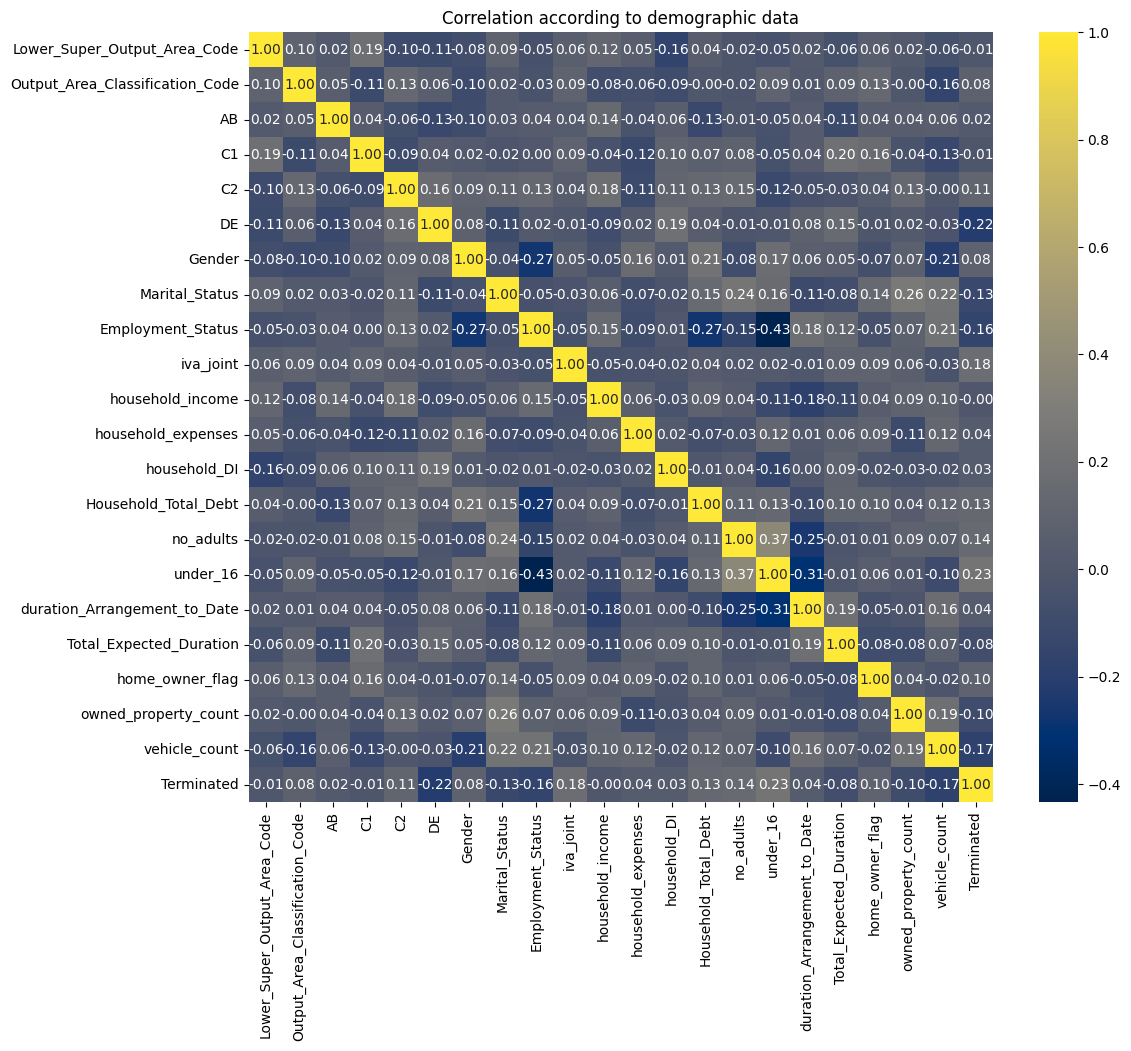

In [165]:
correlation_matrix = data_part1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
plt.title("Correlation according to demographic data")
plt.show()

In [209]:
relevant_features["DE"] = data["DE"]
relevant_features

,DE
0,0.422491
1,0.272480
2,0.326296
3,0.418756
4,0.305580
...,...
112,0.300990
113,0.320679
114,0.333646
115,0.336354


In [200]:
data_part2 = data.iloc[:, 21:]

data_part2

,Terminated,dividend_approved,payment_frequency,contributions_expected_to_date,contributions_received_to_date,TotalPaymentsDue,Arrears_Amount,agreed_missed_flag,Illness_Vulnerability,Addiction_Vulnerability,age,DOB_Year,DOB_Month,in_arrears
0,0,21.29,1,1093.79,1198.79,73595,-105.00,1,1,1,42,1998,6,False
1,1,22.14,1,704.30,354.30,84807,350.00,1,1,1,53,1932,11,True
2,1,15.11,1,830.00,30.00,46539,800.00,0,1,1,27,1957,7,True
3,1,29.24,1,1000.00,300.00,8491,700.00,1,1,1,24,1999,1,True
4,1,31.67,1,700.00,200.00,51192,500.00,1,1,1,31,1958,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,1,23.40,1,1271.45,579.17,83503,692.28,1,1,1,32,1974,9,True
113,1,38.70,1,570.00,228.00,30759,342.00,1,1,1,24,1952,7,True
114,1,20.64,1,1152.01,402.01,86708,750.00,1,1,1,33,2001,3,True
115,0,32.58,1,1374.00,1487.00,61112,-113.00,1,1,1,45,1963,8,False


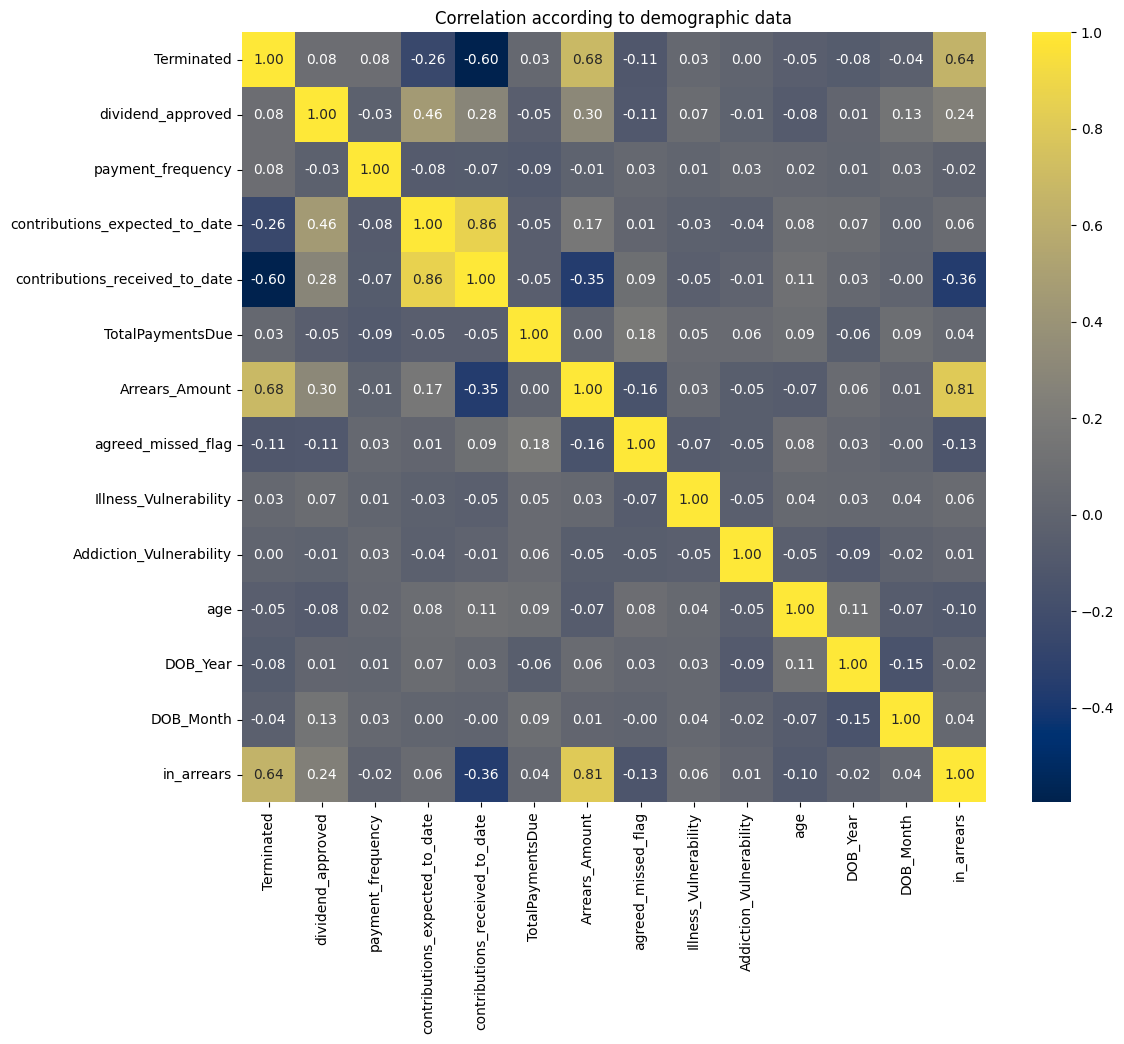

In [201]:
corrmat(data_part2)

In [211]:
relevant_features["contributions_received_to_date"] = data["contributions_received_to_date"]
relevant_features["in_arrears"] = data["in_arrears"]
relevant_features

,DE,contributions_received_to_date,in_arrears
0,0.422491,1198.79,False
1,0.272480,354.30,True
2,0.326296,30.00,True
3,0.418756,300.00,True
4,0.305580,200.00,True
...,...,...,...
112,0.300990,579.17,True
113,0.320679,228.00,True
114,0.333646,402.01,True
115,0.336354,1487.00,False


## Demographic data

In [168]:
demographic_data = data.iloc[:, [0, 1, 2, 3, 4, 5, 21]]

demographic_data

,Lower_Super_Output_Area_Code,Output_Area_Classification_Code,AB,C1,C2,DE,Terminated
0,4174,79,0.137144,0.350114,0.172340,0.422491,0
1,4507,124,0.160399,0.277084,0.228879,0.272480,1
2,1860,119,0.109031,0.246483,0.279942,0.326296,1
3,2294,148,0.381030,0.316609,0.233351,0.418756,1
4,2130,121,0.122695,0.254124,0.222952,0.305580,1
...,...,...,...,...,...,...,...
112,4533,40,0.109303,0.357453,0.247198,0.300990,1
113,4798,66,0.144789,0.271521,0.287837,0.320679,1
114,2275,101,0.127220,0.296572,0.228280,0.333646,1
115,2016,116,0.117146,0.303027,0.204970,0.336354,0


C:\Users\irina\AppData\Local\Temp\ipykernel_17136\2254640401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y='Terminated', x="Lower_Super_Output_Area_Code", data=data, orient='h', palette=['green', 'red'])


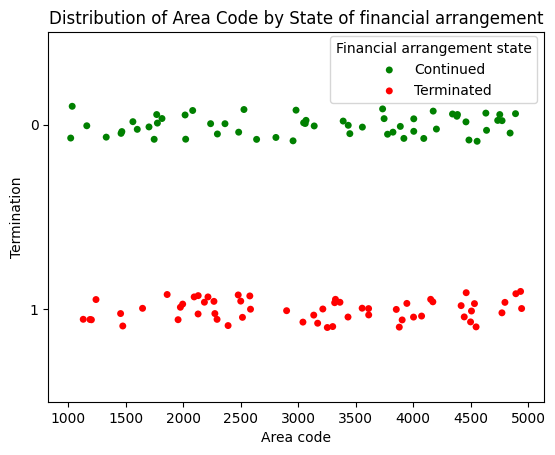

In [169]:
sns.stripplot(y='Terminated', x="Lower_Super_Output_Area_Code", data=data, orient='h', palette=['green', 'red'])

plt.title('Distribution of Area Code by State of financial arrangement')
plt.xlabel('Area code')
plt.ylabel('Termination')
plt.legend(["Continued", "Terminated"], title = "Financial arrangement state", bbox_to_anchor=(1, 1.008))

plt.show()

In [170]:
# by the looks of things, we are going to be making a lot of strip plots - let's make a function

def stripplot(data, parameter_to_look_at):
    sns.stripplot(y="Terminated", x=parameter_to_look_at, data=data, orient='h', palette=['green', 'red'])
    plt.title(f'Distribution of {parameter_to_look_at} by State of financial arrangement')
    plt.xlabel(parameter_to_look_at)
    plt.ylabel('Termination')
    plt.legend(["Continued", "Terminated"], title = "Financial arrangement state", bbox_to_anchor=(1, 1.008))

    plt.show()

C:\Users\irina\AppData\Local\Temp\ipykernel_17136\4228427212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y="Terminated", x=parameter_to_look_at, data=data, orient='h', palette=['green', 'red'])


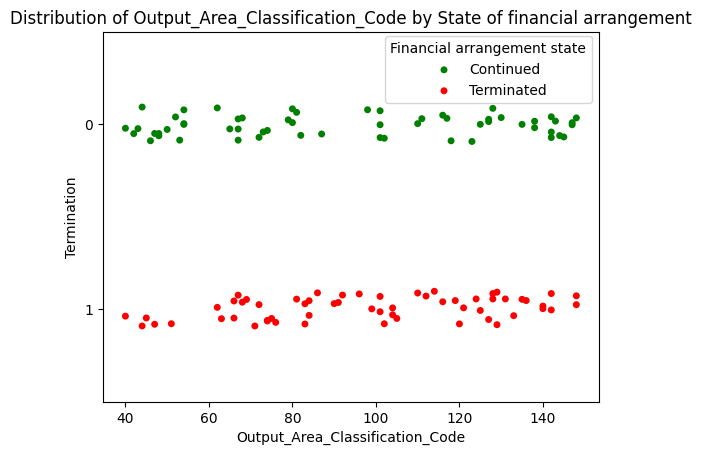

In [171]:
stripplot(data, "Output_Area_Classification_Code")

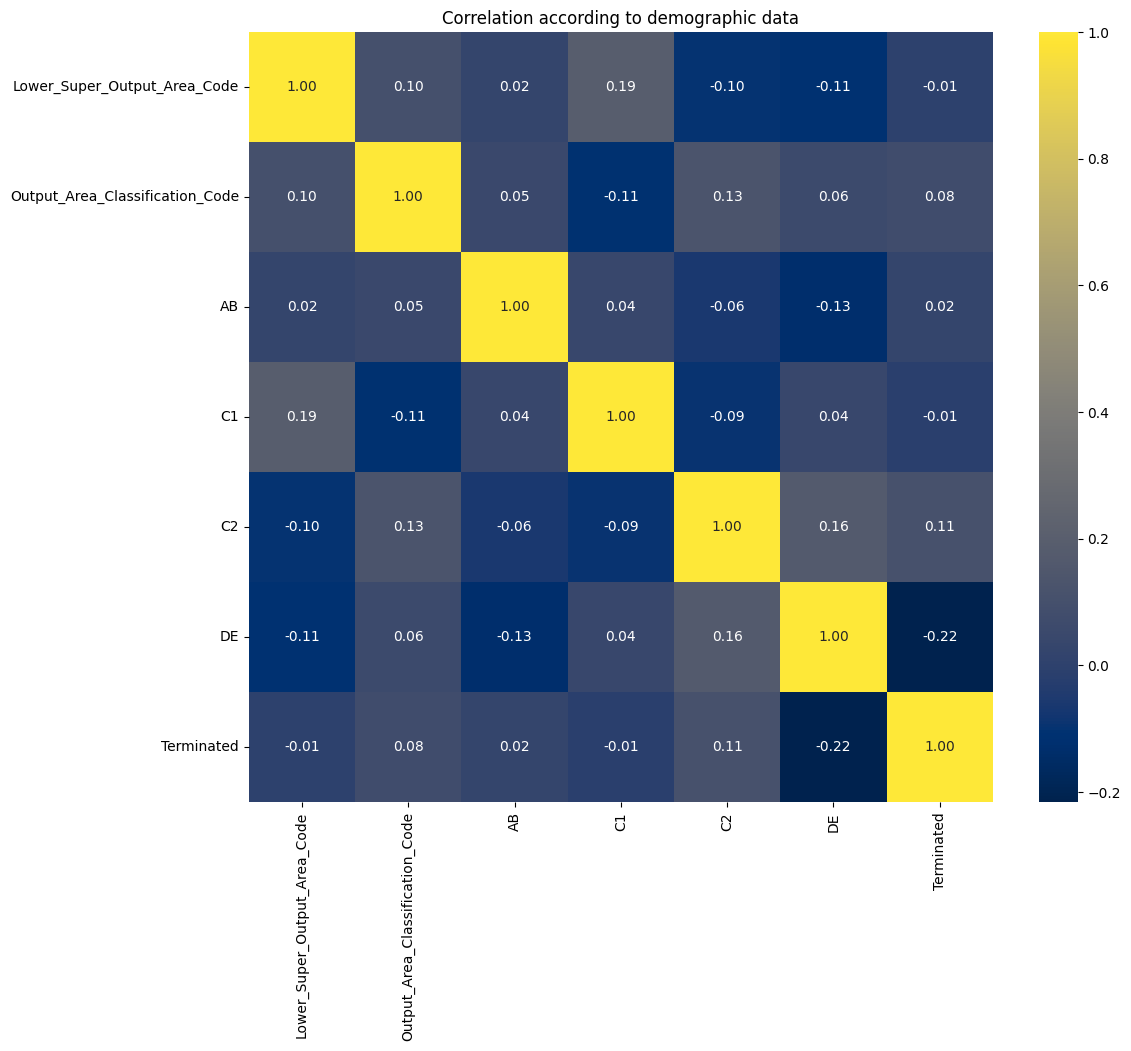

In [172]:
correlation_matrix = demographic_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
plt.title("Correlation according to demographic data")
plt.show()

In [173]:
# do the values of the so called percentages add up to 100?

demographic_perc = data.iloc[:, [0, 1, 2, 3, 4, 5]]

demographic_perc["Total%"] = demographic_data[["AB", "C1", "C2", "DE"]].sum(axis=1)
demographic_perc

# we can see that these values are not adding up to 100% - they are slightly above or slightly below; where are these percentage values from? do they represent the 

C:\Users\irina\AppData\Local\Temp\ipykernel_17136\1453780572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_perc["Total%"] = demographic_data[["AB", "C1", "C2", "DE"]].sum(axis=1)


,Lower_Super_Output_Area_Code,Output_Area_Classification_Code,AB,C1,C2,DE,Total%
0,4174,79,0.137144,0.350114,0.172340,0.422491,1.082090
1,4507,124,0.160399,0.277084,0.228879,0.272480,0.938842
2,1860,119,0.109031,0.246483,0.279942,0.326296,0.961752
3,2294,148,0.381030,0.316609,0.233351,0.418756,1.349747
4,2130,121,0.122695,0.254124,0.222952,0.305580,0.905351
...,...,...,...,...,...,...,...
112,4533,40,0.109303,0.357453,0.247198,0.300990,1.014943
113,4798,66,0.144789,0.271521,0.287837,0.320679,1.024826
114,2275,101,0.127220,0.296572,0.228280,0.333646,0.985718
115,2016,116,0.117146,0.303027,0.204970,0.336354,0.961497


## Gender of client

In [174]:
## I want to compare how many M/F we have
total_by_gender = data.groupby(['Gender']).size().reset_index(name='total_gender_counts')

## assuming that 1 is male and 2 is female
# we have 50M and 66F and 1 likely typo

total_by_gender


,Gender,total_gender_counts
0,1,50
1,2,66


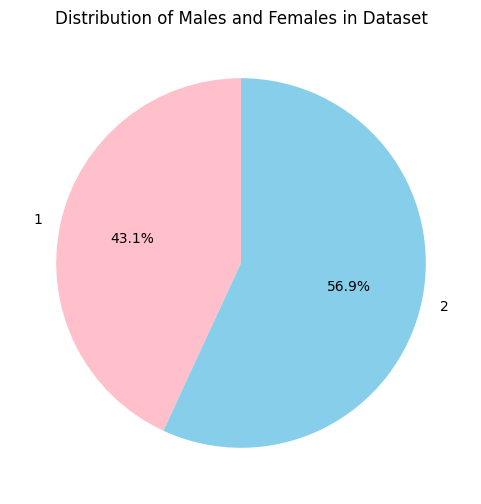

In [175]:
# Create a pie chart for the total counts of males and females
plt.figure(figsize=(6, 6))
plt.pie(total_by_gender['total_gender_counts'], labels=total_by_gender['Gender'], autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue'])
plt.title('Distribution of Males and Females in Dataset')
plt.show()

## fairly equal split 

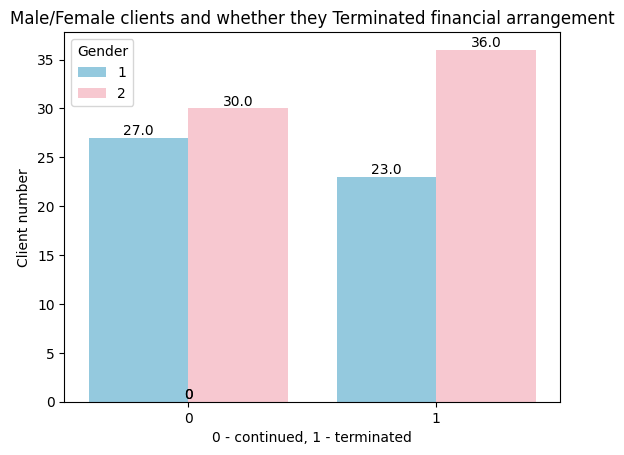

In [176]:
# let's see whether gender affects whether a termination occurs or not 

## Set the palette with custom colors
custom_palette = ['skyblue', 'pink']
sns.set_palette(custom_palette)

ax = sns.countplot(x='Terminated', hue='Gender', data=data, palette=custom_palette)

plt.title('Male/Female clients and whether they Terminated financial arrangement')
plt.xlabel('0 - continued, 1 - terminated')
plt.ylabel('Client number')

## add counts to top of bar plots
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() /2., p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.show()

# maybe slightly more women terminated - but small numbers 

In [177]:
# correlation does not yield any relevance either

## Household finances

In [178]:
data

,Lower_Super_Output_Area_Code,Output_Area_Classification_Code,AB,C1,C2,DE,Gender,Marital_Status,Employment_Status,iva_joint,household_income,household_expenses,household_DI,Household_Total_Debt,no_adults,under_16,duration_Arrangement_to_Date,Total_Expected_Duration,home_owner_flag,owned_property_count,vehicle_count,Terminated,dividend_approved,payment_frequency,contributions_expected_to_date,contributions_received_to_date,TotalPaymentsDue,Arrears_Amount,agreed_missed_flag,Illness_Vulnerability,Addiction_Vulnerability,age,DOB_Year,DOB_Month
0,4174,79,0.137144,0.350114,0.172340,0.422491,2,1,11,1,77218,88410,58132,8906,1,0,11,76,1,0,0,0,21.29,1,1093.79,1198.79,73595,-105.00,1,1,1,42,1998,6
1,4507,124,0.160399,0.277084,0.228879,0.272480,1,1,8,1,64230,79617,79945,62413,1,0,10,71,1,0,0,1,22.14,1,704.30,354.30,84807,350.00,1,1,1,53,1932,11
2,1860,119,0.109031,0.246483,0.279942,0.326296,2,1,6,1,75055,54276,83050,55028,1,0,13,60,1,0,1,1,15.11,1,830.00,30.00,46539,800.00,0,1,1,27,1957,7
3,2294,148,0.381030,0.316609,0.233351,0.418756,2,1,11,1,57373,58492,96402,8287,1,0,12,61,1,0,0,1,29.24,1,1000.00,300.00,8491,700.00,1,1,1,24,1999,1
4,2130,121,0.122695,0.254124,0.222952,0.305580,2,5,6,1,32480,54002,3983,34660,2,4,7,61,1,0,0,1,31.67,1,700.00,200.00,51192,500.00,1,1,1,31,1958,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,4533,40,0.109303,0.357453,0.247198,0.300990,2,5,11,1,39709,90613,85386,92357,1,0,10,67,1,0,2,1,23.40,1,1271.45,579.17,83503,692.28,1,1,1,32,1974,9
113,4798,66,0.144789,0.271521,0.287837,0.320679,2,1,11,1,62120,75910,26425,27660,1,0,12,60,1,0,0,1,38.70,1,570.00,228.00,30759,342.00,1,1,1,24,1952,7
114,2275,101,0.127220,0.296572,0.228280,0.333646,2,1,11,1,20250,53375,27685,6084,1,0,12,62,1,0,0,1,20.64,1,1152.01,402.01,86708,750.00,1,1,1,33,2001,3
115,2016,116,0.117146,0.303027,0.204970,0.336354,2,6,7,1,22172,36435,25578,83197,1,2,13,61,1,0,1,0,32.58,1,1374.00,1487.00,61112,-113.00,1,1,1,45,1963,8


C:\Users\irina\AppData\Local\Temp\ipykernel_17136\4228427212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y="Terminated", x=parameter_to_look_at, data=data, orient='h', palette=['green', 'red'])


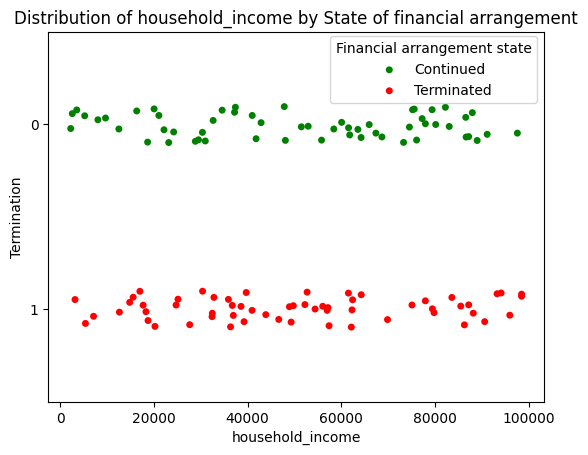

In [179]:
stripplot(data, "household_income")

C:\Users\irina\AppData\Local\Temp\ipykernel_17136\4228427212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y="Terminated", x=parameter_to_look_at, data=data, orient='h', palette=['green', 'red'])


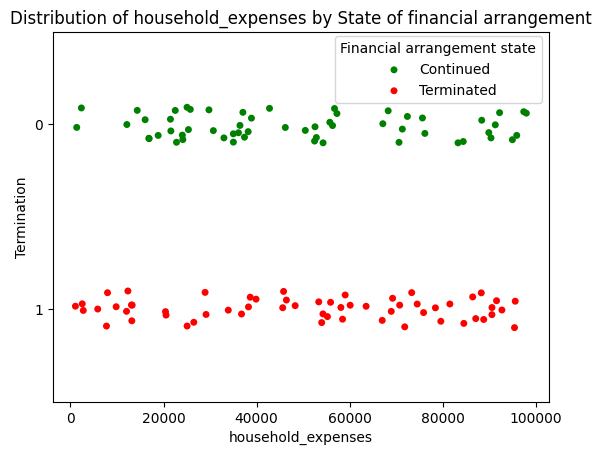

In [180]:
stripplot(data, "household_expenses")

C:\Users\irina\AppData\Local\Temp\ipykernel_17136\4228427212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y="Terminated", x=parameter_to_look_at, data=data, orient='h', palette=['green', 'red'])


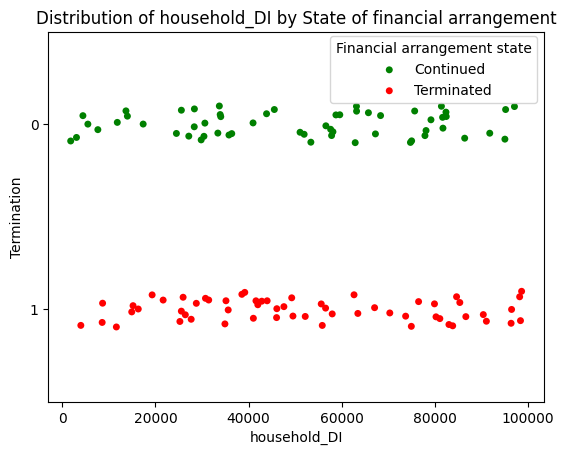

In [181]:
stripplot(data, "household_DI")

C:\Users\irina\AppData\Local\Temp\ipykernel_17136\4228427212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y="Terminated", x=parameter_to_look_at, data=data, orient='h', palette=['green', 'red'])


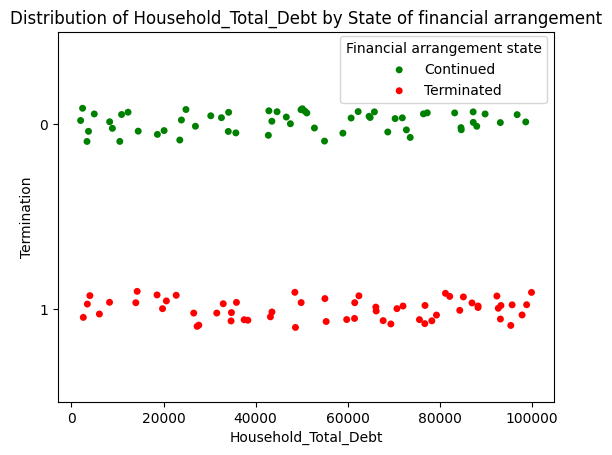

In [182]:
stripplot(data, "Household_Total_Debt")

In [183]:
# in addition, none of these correlate strongly with the outcome

## Arrears
money that is owed and should have been paid earlier 

- Arrears_Amount - Amount of arrears under the arrangement.
- arrears_months - Number of months the arrangement has been in arrears.
- Arrears_Category - Category of arrears, encoded as an integer.

In [188]:
arrears_data = data.iloc[:, [-7]]

arrears_data

# arrears cat 
# missing values - none in arrears amount, 54 in arrears_months, 86 in arrears_category

,Arrears_Amount
0,-105.00
1,350.00
2,800.00
3,700.00
4,500.00
...,...
112,692.28
113,342.00
114,750.00
115,-113.00


In [189]:
# let's instead create a new variable 'in_arrears' that is boolean, where 1 means in arrears, 0 means not in arrears
arrears_data["in_arrears"] = arrears_data["Arrears_Amount"] > 0

arrears_data

C:\Users\irina\AppData\Local\Temp\ipykernel_17136\3470347154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrears_data["in_arrears"] = arrears_data["Arrears_Amount"] > 0


,Arrears_Amount,in_arrears
0,-105.00,False
1,350.00,True
2,800.00,True
3,700.00,True
4,500.00,True
...,...,...
112,692.28,True
113,342.00,True
114,750.00,True
115,-113.00,False


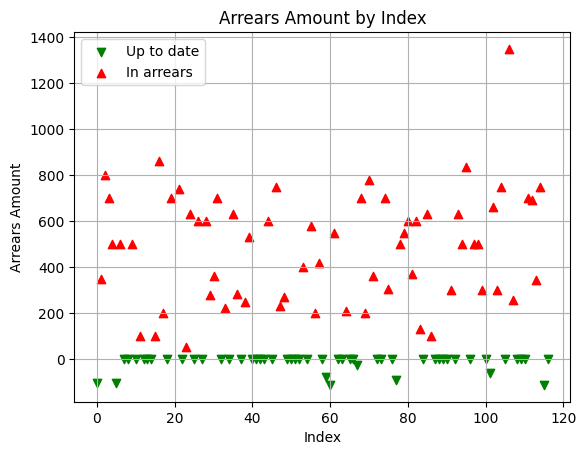

In [190]:
# Separate positive and negative values
positive_values = arrears_data[arrears_data['in_arrears'] == 0]['Arrears_Amount']
negative_values = arrears_data[arrears_data['in_arrears'] == 1]['Arrears_Amount']

# Plotting
plt.scatter(positive_values.index, positive_values, color='green', marker='v', label='Up to date')
plt.scatter(negative_values.index, negative_values, color='red', marker='^', label='In arrears')

# Set labels and title
plt.title('Arrears Amount by Index')
plt.xlabel('Index')
plt.ylabel('Arrears Amount')

# Add legend
plt.legend()

plt.grid(True)
plt.show()

C:\Users\irina\AppData\Local\Temp\ipykernel_17136\895755865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='in_arrears', y='count', data=aggregated_data, palette = ['green', 'red'])


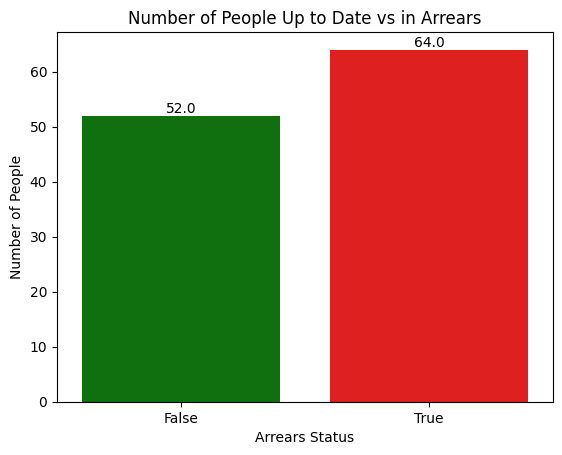

In [191]:
# Aggregate data to count the number of people in arrears and up to date
aggregated_data = arrears_data.groupby('in_arrears').size().reset_index(name='count')

# Plotting the boxplot
ax = sns.barplot(x='in_arrears', y='count', data=aggregated_data, palette = ['green', 'red'])

# Adding labels and title
plt.title('Number of People Up to Date vs in Arrears')
plt.xlabel('Arrears Status')
plt.ylabel('Number of People')

## add counts to top of bar plots
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() /2., p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.show()

plt.show()

In [202]:
# let's add on terminated to this and do a corr mat

termination = data.iloc[:, 21]
termination

0      0
1      1
2      1
3      1
4      1
      ..
112    1
113    1
114    1
115    0
116    0
Name: Terminated, Length: 116, dtype: int64

In [203]:
arrears_and_term_data = pd.concat([arrears_data, termination], axis=1)
arrears_and_term_data

,Arrears_Amount,in_arrears,Terminated
0,-105.00,False,0
1,350.00,True,1
2,800.00,True,1
3,700.00,True,1
4,500.00,True,1
...,...,...,...
112,692.28,True,1
113,342.00,True,1
114,750.00,True,1
115,-113.00,False,0


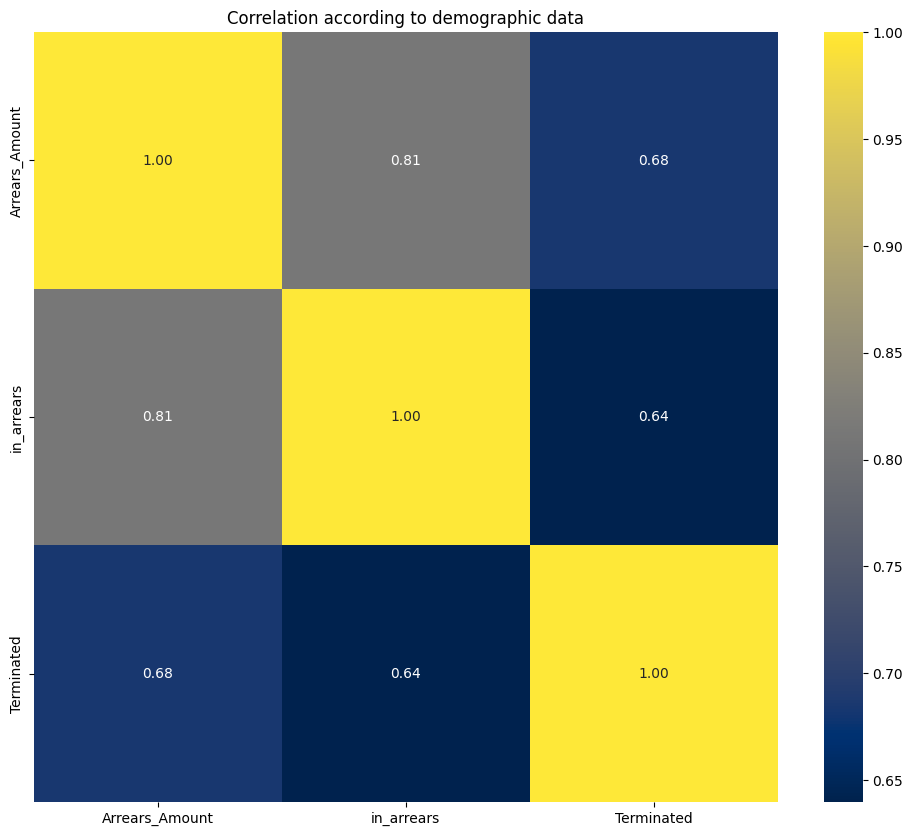

In [204]:
corrmat(arrears_and_term_data)

## Contributions expected vs contributions received

- contributions_expected_to_date - Contributions expected up to the current date.
- contributions_received_to_date - Contributions received up to the current date.

In [192]:
data

,Lower_Super_Output_Area_Code,Output_Area_Classification_Code,AB,C1,C2,DE,Gender,Marital_Status,Employment_Status,iva_joint,household_income,household_expenses,household_DI,Household_Total_Debt,no_adults,under_16,duration_Arrangement_to_Date,Total_Expected_Duration,home_owner_flag,owned_property_count,vehicle_count,Terminated,dividend_approved,payment_frequency,contributions_expected_to_date,contributions_received_to_date,TotalPaymentsDue,Arrears_Amount,agreed_missed_flag,Illness_Vulnerability,Addiction_Vulnerability,age,DOB_Year,DOB_Month
0,4174,79,0.137144,0.350114,0.172340,0.422491,2,1,11,1,77218,88410,58132,8906,1,0,11,76,1,0,0,0,21.29,1,1093.79,1198.79,73595,-105.00,1,1,1,42,1998,6
1,4507,124,0.160399,0.277084,0.228879,0.272480,1,1,8,1,64230,79617,79945,62413,1,0,10,71,1,0,0,1,22.14,1,704.30,354.30,84807,350.00,1,1,1,53,1932,11
2,1860,119,0.109031,0.246483,0.279942,0.326296,2,1,6,1,75055,54276,83050,55028,1,0,13,60,1,0,1,1,15.11,1,830.00,30.00,46539,800.00,0,1,1,27,1957,7
3,2294,148,0.381030,0.316609,0.233351,0.418756,2,1,11,1,57373,58492,96402,8287,1,0,12,61,1,0,0,1,29.24,1,1000.00,300.00,8491,700.00,1,1,1,24,1999,1
4,2130,121,0.122695,0.254124,0.222952,0.305580,2,5,6,1,32480,54002,3983,34660,2,4,7,61,1,0,0,1,31.67,1,700.00,200.00,51192,500.00,1,1,1,31,1958,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,4533,40,0.109303,0.357453,0.247198,0.300990,2,5,11,1,39709,90613,85386,92357,1,0,10,67,1,0,2,1,23.40,1,1271.45,579.17,83503,692.28,1,1,1,32,1974,9
113,4798,66,0.144789,0.271521,0.287837,0.320679,2,1,11,1,62120,75910,26425,27660,1,0,12,60,1,0,0,1,38.70,1,570.00,228.00,30759,342.00,1,1,1,24,1952,7
114,2275,101,0.127220,0.296572,0.228280,0.333646,2,1,11,1,20250,53375,27685,6084,1,0,12,62,1,0,0,1,20.64,1,1152.01,402.01,86708,750.00,1,1,1,33,2001,3
115,2016,116,0.117146,0.303027,0.204970,0.336354,2,6,7,1,22172,36435,25578,83197,1,2,13,61,1,0,1,0,32.58,1,1374.00,1487.00,61112,-113.00,1,1,1,45,1963,8


In [193]:
contributions_data = data.iloc[:, [24,25]]
contributions_data

,contributions_expected_to_date,contributions_received_to_date
0,1093.79,1198.79
1,704.30,354.30
2,830.00,30.00
3,1000.00,300.00
4,700.00,200.00
...,...,...
112,1271.45,579.17
113,570.00,228.00
114,1152.01,402.01
115,1374.00,1487.00


In [194]:
contributions_data

,contributions_expected_to_date,contributions_received_to_date
0,1093.79,1198.79
1,704.30,354.30
2,830.00,30.00
3,1000.00,300.00
4,700.00,200.00
...,...,...
112,1271.45,579.17
113,570.00,228.00
114,1152.01,402.01
115,1374.00,1487.00


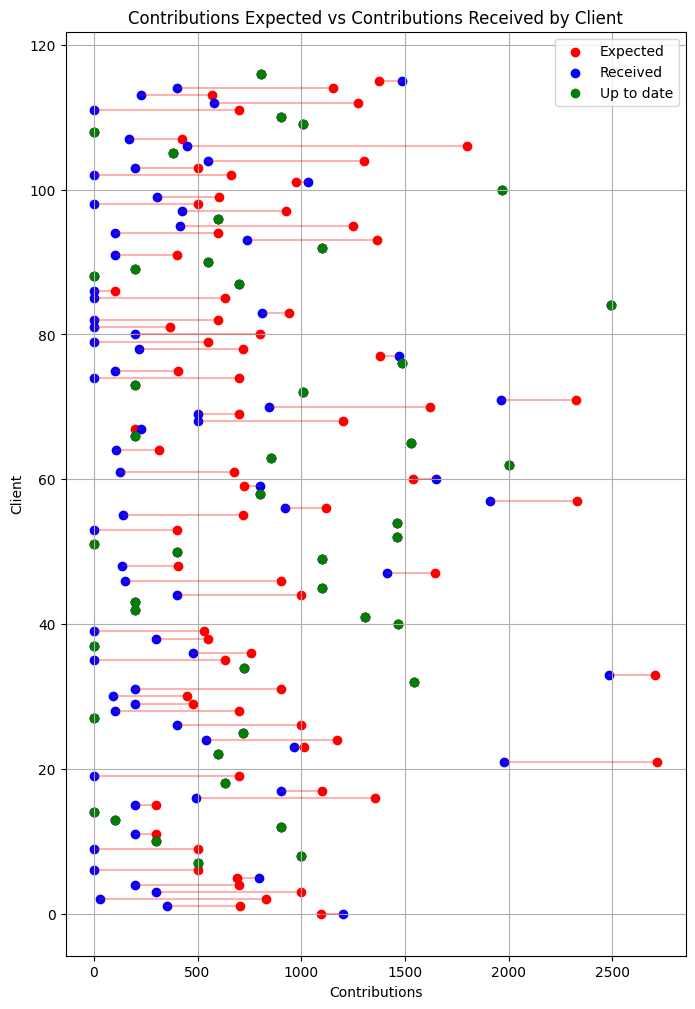

In [195]:
# Plotting
plt.figure(figsize=(8, 12))

# Extract the row indices
row_indices = contributions_data.index

# Scatter plot for contributions expected to date
plt.scatter(contributions_data['contributions_expected_to_date'], row_indices, color='red', label='Expected')

# Scatter plot for contributions received to date
plt.scatter(contributions_data['contributions_received_to_date'], row_indices, color='blue', label='Received')

# Plot green dots where values are equal
equal_indices = contributions_data[contributions_data['contributions_expected_to_date'] == contributions_data['contributions_received_to_date']].index
plt.scatter(contributions_data.loc[equal_indices, 'contributions_expected_to_date'], equal_indices, color='green', label='Up to date')

# Iterate through each row and plot a line connecting the points
for index, row in contributions_data.iterrows():
    if not pd.isnull(row['contributions_expected_to_date']) and not pd.isnull(row['contributions_received_to_date']):
        plt.plot([row['contributions_expected_to_date'], row['contributions_received_to_date']], [index, index], color='red', alpha=0.3)
        
# Set labels and title
plt.title('Contributions Expected vs Contributions Received by Client')
plt.xlabel('Contributions')
plt.ylabel('Client')

# Add legend
plt.legend()

plt.grid(True)
plt.show()

# Model

In [216]:
## split into dependent and indep variables

## dep variable is Terminated - has the financial agreement been terminated or not 
y = data.iloc[:, 21]

y

0      0
1      1
2      1
3      1
4      1
      ..
112    1
113    1
114    1
115    0
116    0
Name: Terminated, Length: 116, dtype: int64

In [217]:
# indep features that have a significant correlation with termination
X = relevant_features.copy()
X

,DE,contributions_received_to_date,in_arrears
0,0.422491,1198.79,False
1,0.272480,354.30,True
2,0.326296,30.00,True
3,0.418756,300.00,True
4,0.305580,200.00,True
...,...,...,...
112,0.300990,579.17,True
113,0.320679,228.00,True
114,0.333646,402.01,True
115,0.336354,1487.00,False


## Naive Bayes

In [218]:
## data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

## create naive bayes
gaussian_model = GaussianNB() 

## train model
gaussian_model.fit(X_train, y_train)

## make prediction
pred_NB = gaussian_model.predict(X_test)

In [219]:
## calculate accuracy and confusion matrix
accuracy_NB = accuracy_score(y_test, pred_NB)
conf_mat_NB =  confusion_matrix(y_test,pred_NB)

print(accuracy_NB)

0.9310344827586207


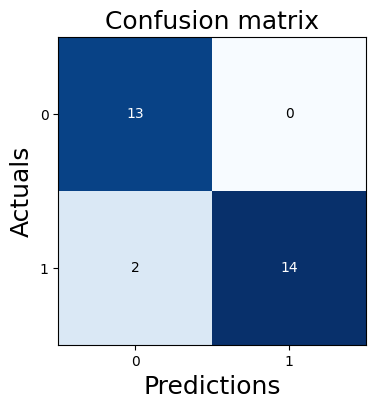

In [220]:
fig, ax2 = plot_confusion_matrix(conf_mat=conf_mat_NB, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## Logistic Regression

In [221]:
## train logistic regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

##  make LR prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

## calculate accuracy and confusion matrix
accuracy_LR = accuracy_score(y_test, pred_LR)
conf_mat_LR =  confusion_matrix(y_test,pred_LR )

print(accuracy_LR)

0.9655172413793104


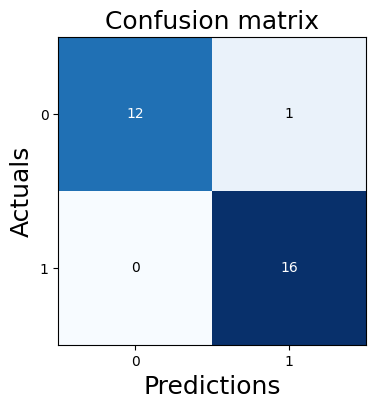

In [222]:
fig, ax2 = plot_confusion_matrix(conf_mat=conf_mat_LR, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## TP 12, FP 1
## FN 0, TN 16

## k Nearest Neighbour

In [223]:
## build kNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

## make prediction
y_pred_knn = knn_model.predict(X_test)

## calculate accuracy and confusion matrix
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.8275862068965517
[[11  2]
 [ 3 13]]


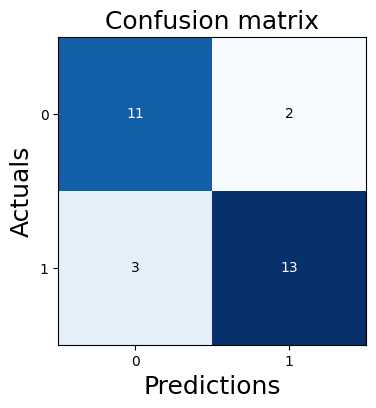

In [224]:
fig, ax4 = plot_confusion_matrix(conf_mat=conf_mat_knn, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## Decision Tree Classifier

In [225]:
## default Decision Tree
decisionTree_model_gini = DecisionTreeClassifier()

## entropy decision tree
decisionTree_model_entropy = DecisionTreeClassifier(criterion='entropy')

## max depth 3 decision tree
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)

## Fit models
decisionTree_model_gini.fit(X_train, y_train)
decisionTree_model_entropy.fit(X_train, y_train)
decisionTree_model_depth3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [226]:
# Make predictions
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth3.predict(X_test)

### Gini

In [227]:
## calculate accuracy and confusion matrix
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)


print(accuracy_gini)
print(conf_mat_gini)

0.9310344827586207
[[13  0]
 [ 2 14]]


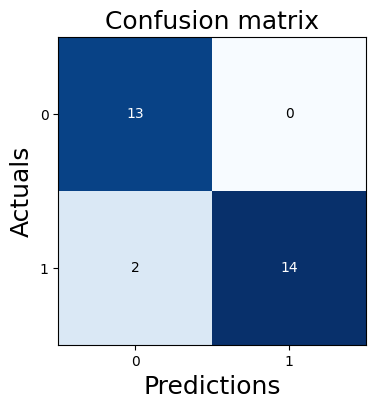

In [228]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_gini, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

### Entropy

In [229]:
## calculate accuracy and confusion matrix
accuracy_entropy = accuracy_score(y_test, y_pred_gini)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)


print(accuracy_entropy)
print(conf_mat_entropy)

0.9310344827586207
[[13  0]
 [ 2 14]]


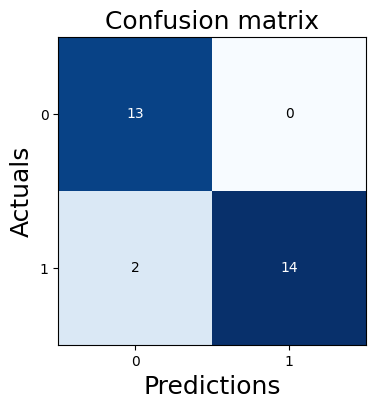

In [230]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_entropy, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

### Max depth 3

In [231]:
accuracy_depth3 = accuracy_score(y_test, y_pred_depth3)
conf_mat_depth3 = confusion_matrix(y_test, y_pred_depth3)


print(accuracy_depth3)
print(conf_mat_depth3)

0.896551724137931
[[12  1]
 [ 2 14]]


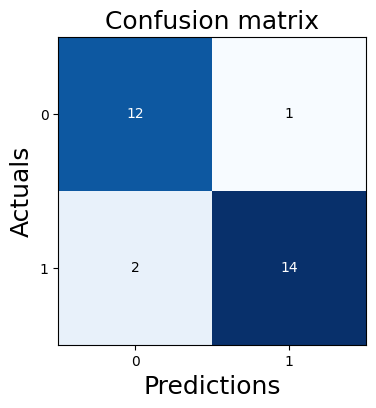

In [232]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_depth3, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## SVM

In [233]:
## create 3 svm classifiers
linear_SVM = svm.SVC(kernel='linear')
sigmoid_SVM = svm.SVC(kernel='sigmoid')
rbf_SVM = svm.SVC(kernel='rbf')

## train model on our data
linear_SVM.fit(X_train, y_train)
sigmoid_SVM.fit(X_train, y_train)
rbf_SVM.fit(X_train, y_train)

## predict 
y_pred_linear = linear_SVM.predict(X_test)
y_pred_sigmoid = sigmoid_SVM.predict(X_test)
y_pred_rbf = rbf_SVM.predict(X_test)

### Linear

In [234]:
## calculate accuracy and confusion matrix
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)


print(accuracy_linear)
print(conf_mat_linear)

0.896551724137931
[[12  1]
 [ 2 14]]


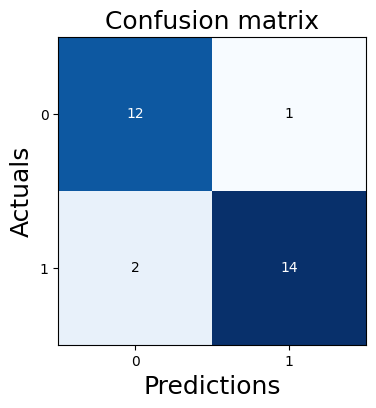

In [235]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_linear, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

### Sigmoid

In [236]:
## calculate accuracy and confusion matrix
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)


print(accuracy_sigmoid)
print(conf_mat_sigmoid)

0.6896551724137931
[[10  3]
 [ 6 10]]


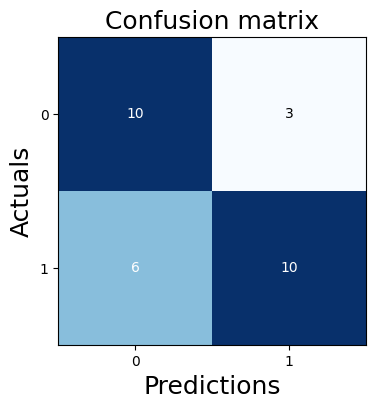

In [237]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_sigmoid, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

### RBF

In [238]:
## calculate accuracy and confusion matrix
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)


print(accuracy_rbf)
print(conf_mat_rbf)

0.7931034482758621
[[ 9  4]
 [ 2 14]]


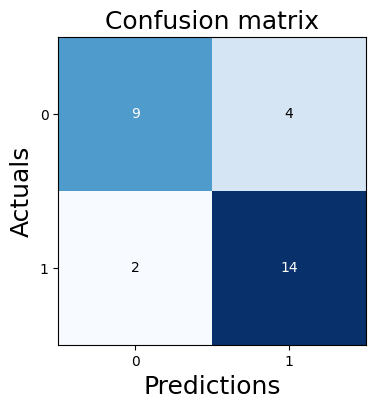

In [239]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_rbf, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## Random Forest

In [240]:
## setup random forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

## predict 
pred_RF = RF.predict(X_test)

In [241]:
## calculate accuracy and confusion matrix
accuracy_RF = accuracy_score(y_test, pred_RF)
conf_mat_RF = confusion_matrix(y_test, pred_RF)


print(accuracy_RF)
print(conf_mat_RF)

0.9310344827586207
[[13  0]
 [ 2 14]]


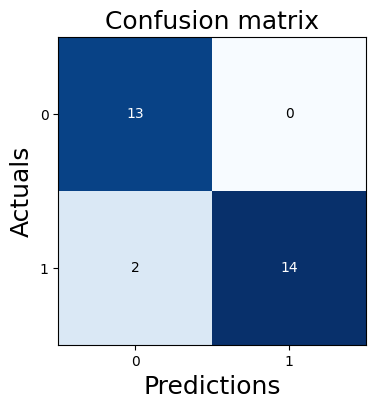

In [242]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_RF, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()